In [1]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train.csv


In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
#LOAD THE DATASET
data = pd.read_csv("train.csv")

EXPLORATORY DATA ANALYSIS

In [4]:
data.shape

(13994, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [6]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [7]:
data[data.duplicated()]


,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection


In [8]:
data.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [9]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [10]:
#Checking for nullvalues
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [11]:
[features for features in data.columns if data[features].isnull().sum()>0]

['gender',
 'weight',
 'ball_controlling_skills',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'shot_accuracy',
 'strong_foot',
 'behaviour_rating',
 'matches_played',
 'fitness_rating',
 'coaching',
 'years_of_experience']

In [12]:
100*data.isnull().sum()/data.shape[0]

player_id                    0.000000
name                         0.000000
age                          0.000000
gender                       0.135772
country                      0.000000
height                       0.000000
weight                       2.979849
ball_controlling_skills      2.951265
body_reflexes                0.000000
body_balance                 0.000000
jumping_skills               0.171502
penalties_conversion_rate    0.214378
mental_strength              0.200086
goalkeeping_skills           0.000000
defending_skills             0.000000
passing_skills               0.000000
dribbling_skills             0.000000
shot_accuracy                4.087466
body_strength_stamina        0.000000
max_running_speed            0.000000
strong_foot                  3.944548
behaviour_rating             5.023582
matches_played               4.759183
fitness_rating               4.966414
trophies_won                 0.000000
dedication_level             0.000000
coaching    

In [13]:
data.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      4
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [15]:
for col in data.columns:
  print(col)
  print(data[col].unique())
  print()



player_id
['PLID_4964' 'PLID_11234' 'PLID_19127' ... 'PLID_5193' 'PLID_12173'
 'PLID_236']

name
['Keva Horan' 'Herma Tann' 'Eilene Kizer' ... 'Marylouise Mosley'
 'Teri Escamilla' 'Darius Schuman']

age
[23 18 16 27 19 21 24 25 17 29 20 28 22 26 32 31 51 30 36 34 33 52 57 54
 35 50 39 49 55 53 48 59 60 37 58 61 38 56 40]

gender
['M' 'F' nan]

country
['Ukraine' 'Russia' 'Spain' 'Chile' 'Argentina' 'Guinea' 'China PR'
 'United States' 'Italy' 'Belgium' 'Germany' 'England' 'Colombia' 'Brazil'
 'France' 'Netherlands' 'Afghanistan' 'Sweden' 'Switzerland' 'Ghana'
 'Poland' 'Iceland' 'Bulgaria' 'Mexico' 'Northern Ireland' 'Uruguay'
 'Ivory Coast' 'Portugal' 'New Zealand' 'Norway' 'Korea Republic'
 'Scotland' 'Greece' 'Denmark' 'Slovakia' 'Japan' 'Togo' 'Slovenia'
 'Finland' 'Australia' 'Paraguay' 'Republic of Ireland' 'Croatia'
 'Saudi Arabia' 'Wales' 'Czech Republic' 'Austria' 'Georgia' 'Gabon'
 'Turkey' 'Madagascar' 'Serbia' 'Congo' 'Tunisia' 'Canada' 'Senegal'
 'Thailand' 'Kosovo' 'Isra

In [16]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [17]:
data.corr()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000000,0.083226,-0.008863,-0.057670,0.143558,0.123803,0.314631,0.077189,0.156910,0.153986,...,0.149276,0.201067,-0.131127,0.373710,0.211322,0.079287,0.031321,0.841174,-0.010648,-0.161858
ball_controlling_skills,0.083226,1.000000,0.702451,0.603590,0.204900,0.769665,0.698116,-0.788039,0.599675,0.896749,...,0.896938,0.552414,0.685486,0.456825,0.213193,0.724426,0.271955,0.092147,-0.007704,0.266491
body_reflexes,-0.008863,0.702451,1.000000,0.760907,0.225810,0.564346,0.450446,-0.537320,0.296905,0.672426,...,0.656593,0.275718,0.797895,0.283540,0.087777,0.571632,0.236306,-0.020540,-0.015511,0.162903
body_balance,-0.057670,0.603590,0.760907,1.000000,0.201172,0.486471,0.337687,-0.520488,0.289356,0.584480,...,0.541877,0.129391,0.687482,0.159227,0.041408,0.482731,0.197795,-0.074671,-0.012731,0.100898
jumping_skills,0.143558,0.204900,0.225810,0.201172,1.000000,0.135705,0.264315,-0.204789,0.326436,0.157543,...,0.186959,0.404124,0.245175,0.267306,0.112615,0.363427,0.056760,0.156122,-0.010994,0.085277
penalties_conversion_rate,0.123803,0.769665,0.564346,0.486471,0.135705,1.000000,0.568721,-0.631879,0.305723,0.691159,...,0.873006,0.391848,0.542965,0.353688,0.212820,0.518531,0.248151,0.142095,-0.012323,0.177305
mental_strength,0.314631,0.698116,0.450446,0.337687,0.264315,0.568721,1.000000,-0.423501,0.521529,0.712112,...,0.684802,0.528807,0.384256,0.665164,0.363217,0.544183,0.227516,0.368217,-0.002148,0.319026
goalkeeping_skills,0.077189,-0.788039,-0.537320,-0.520488,-0.204789,-0.631879,-0.423501,1.000000,-0.660254,-0.661463,...,-0.717514,-0.546024,-0.625644,-0.078789,-0.004823,-0.704367,-0.176665,0.098214,0.013678,-0.047467
defending_skills,0.156910,0.599675,0.296905,0.289356,0.326436,0.305723,0.521529,-0.660254,1.000000,0.636592,...,0.464936,0.680394,0.335472,0.390215,0.157260,0.699844,0.100340,0.178304,0.001202,0.153933
passing_skills,0.153986,0.896749,0.672426,0.584480,0.157543,0.691159,0.712112,-0.661463,0.636592,1.000000,...,0.849184,0.501256,0.595467,0.512608,0.254732,0.685628,0.265326,0.178630,-0.008077,0.257658


<Axes: >

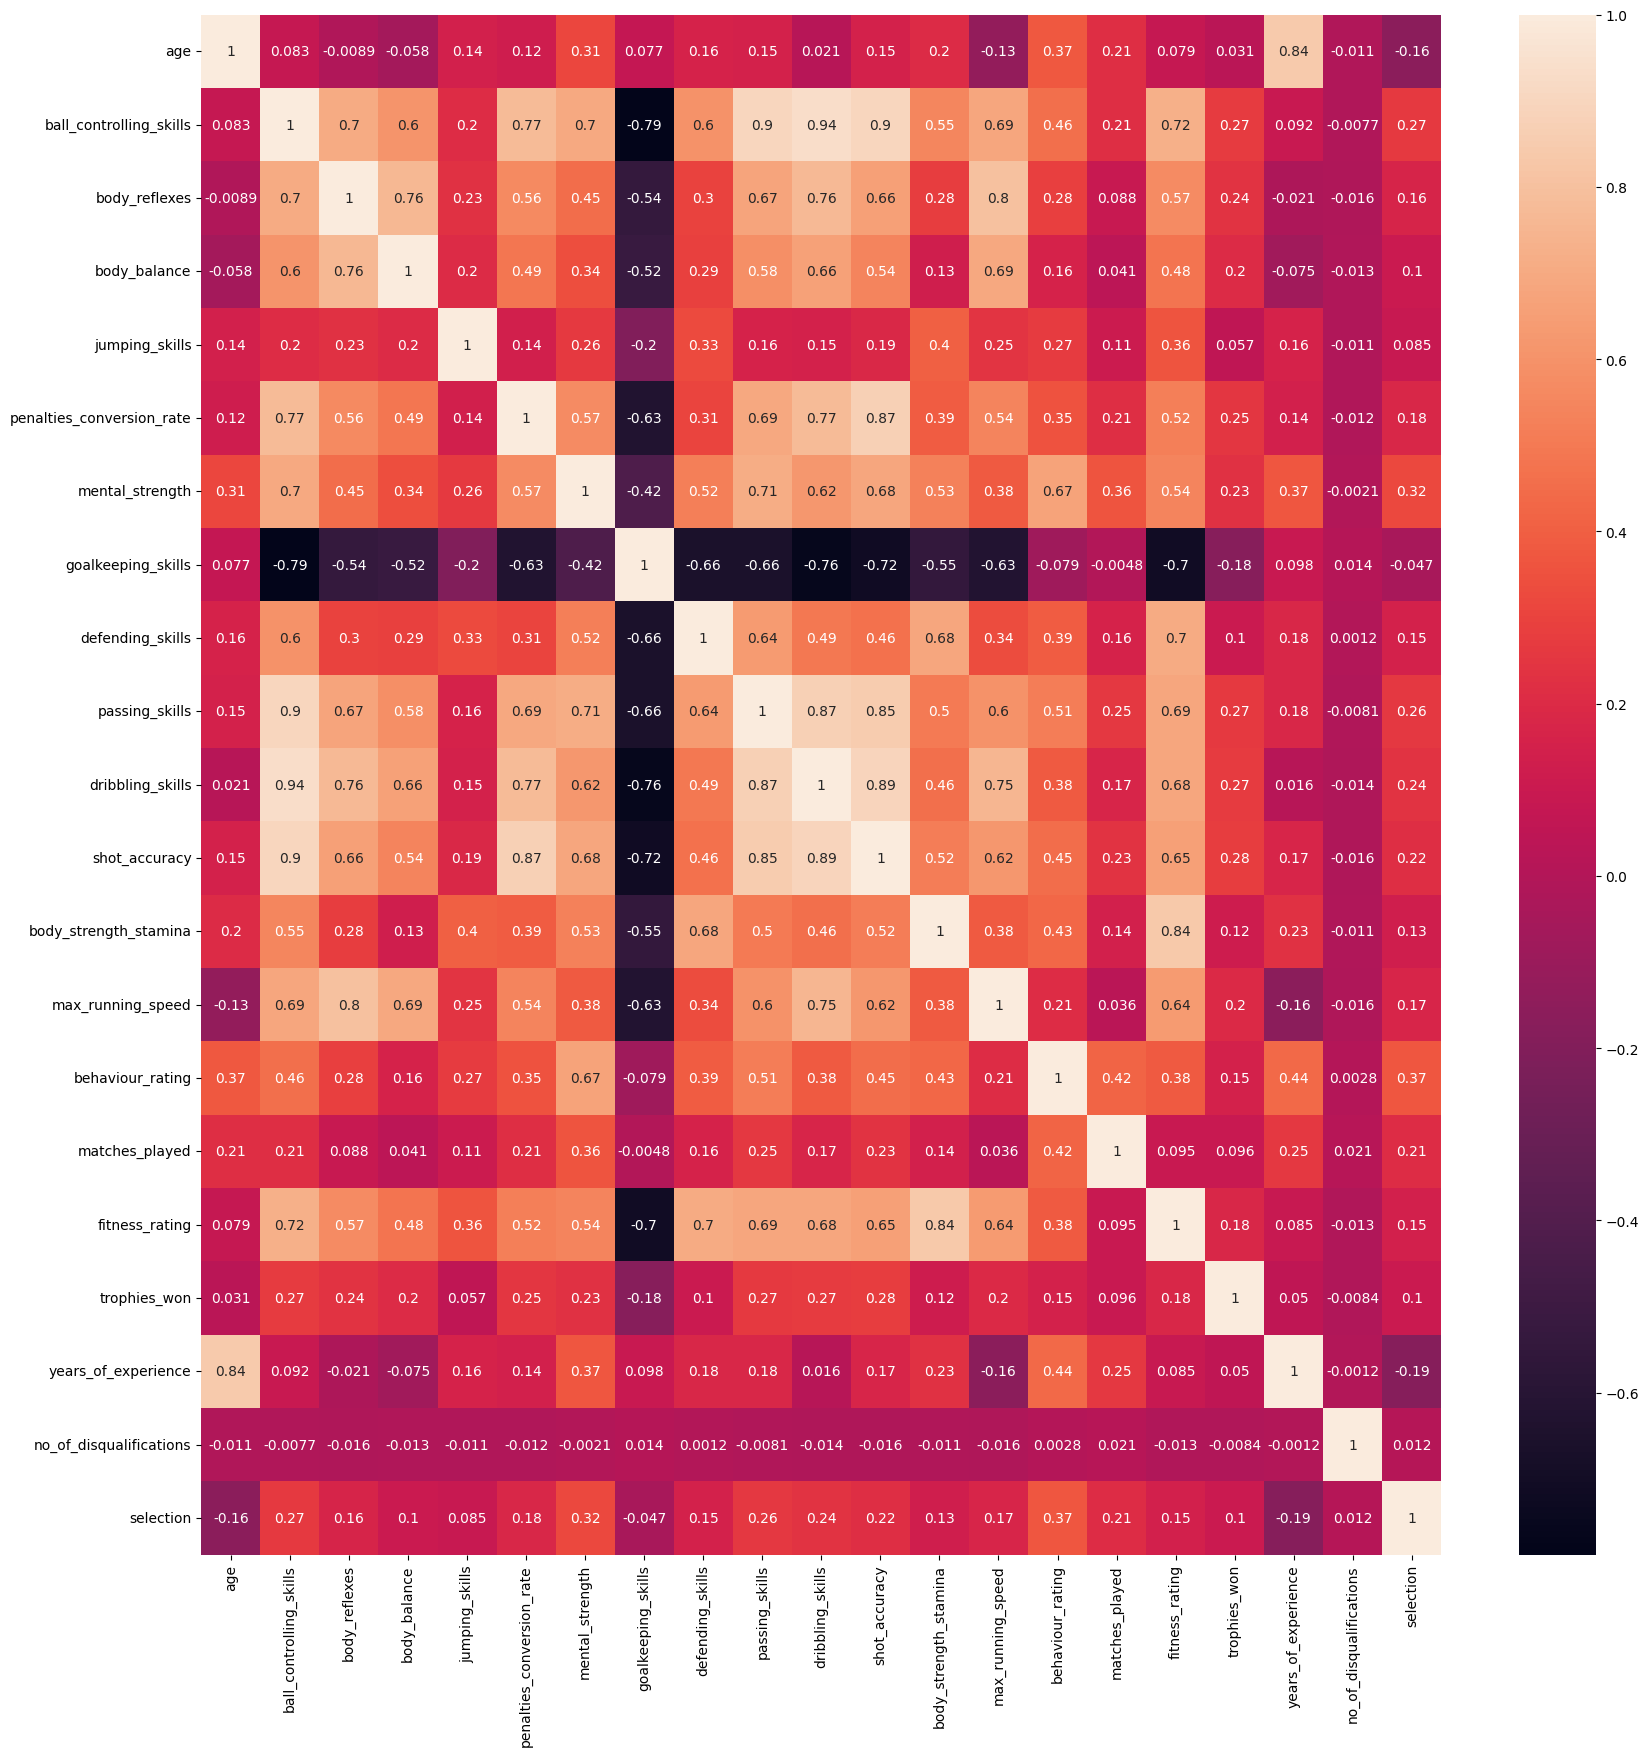

In [19]:
#CHECKING FOR CORRELARION BETWEEN FEATURES
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [26]:
#Checking numerical  columns
numerical_columns = [col for col in data.columns if data.dtypes[col] != 'object']
print(numerical_columns)

['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


In [24]:
#Checking categorical columns
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']
print(categorical_columns)

['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


In [25]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(data[col].unique())} for col in categorical_columns]
unique_categories_count_list

[{'player_id': 13994},
 {'name': 13994},
 {'gender': 3},
 {'country': 163},
 {'height': 31},
 {'weight': 89},
 {'strong_foot': 5},
 {'dedication_level': 3},
 {'coaching': 5}]

In [20]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

Vi

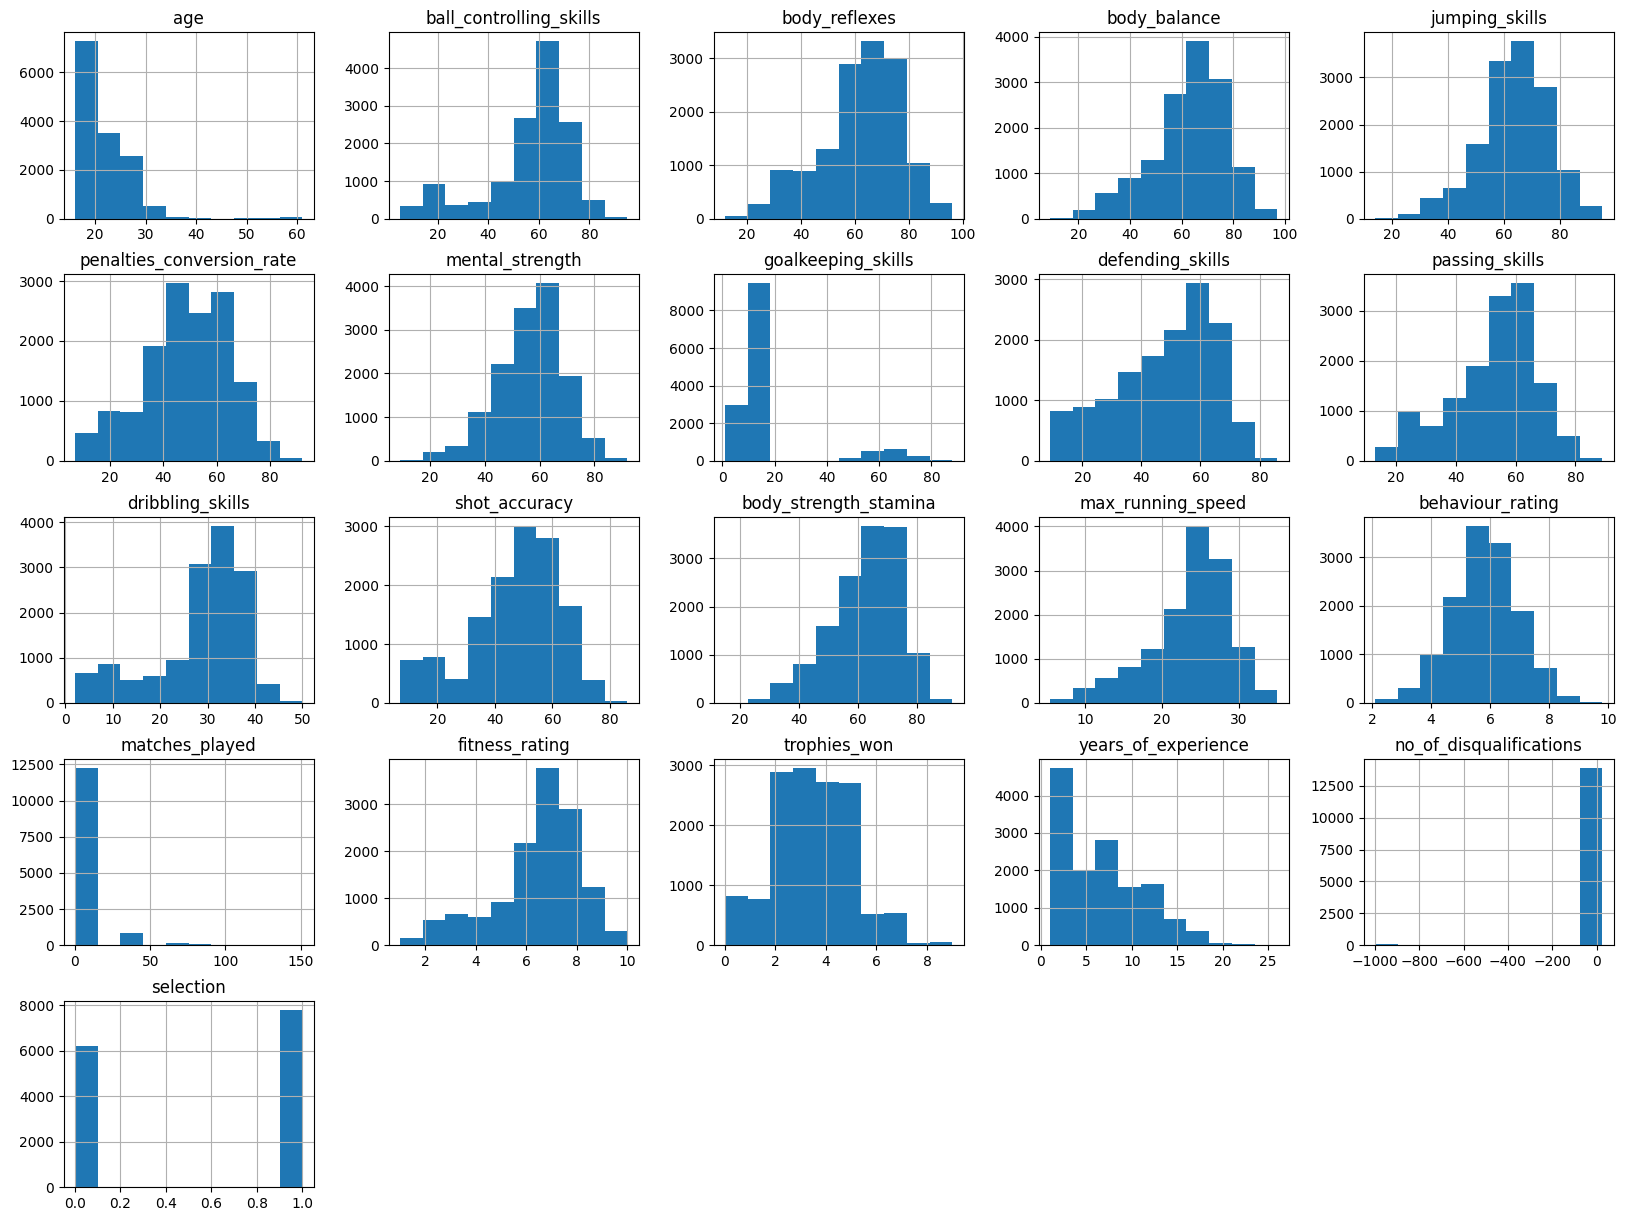

In [21]:
freqgraph = data.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [37]:
data['gender'].value_counts()


M    6992
F    6983
Name: gender, dtype: int64

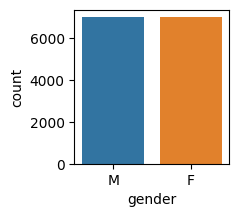

In [45]:
plot = plt.figure(figsize=(2,2))
sns.countplot(x='gender', data=data)
plot.show()

In [36]:
data['strong_foot'].value_counts()

Right    8359
Left     2531
None     1281
Any      1271
Name: strong_foot, dtype: int64

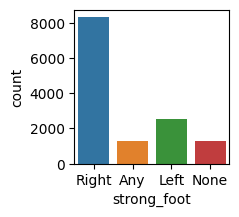

In [47]:
plot = plt.figure(figsize=(2,2))
sns.countplot(x='strong_foot', data=data)
plot.show()

In [40]:
data['coaching'].value_counts()

Academy        9390
Talent Hunt    1993
Unknown        1360
Source         1126
Name: coaching, dtype: int64

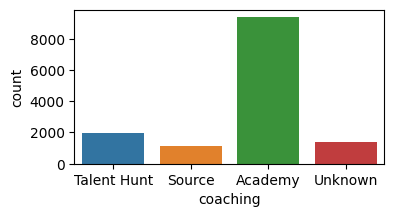

In [50]:
plot = plt.figure(figsize=(4,2))
sns.countplot(x='coaching', data=data)
plot.show()

In [51]:
data['dedication_level'].value_counts()

Medium    9704
High      3557
Low        733
Name: dedication_level, dtype: int64

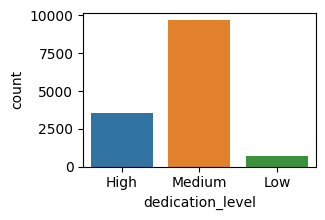

In [53]:
plot = plt.figure(figsize=(3,2))
sns.countplot(x='dedication_level', data=data)
plot.show()

In [54]:
data['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

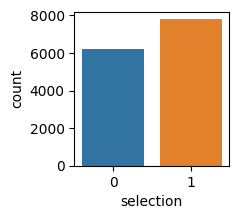

In [56]:
plot = plt.figure(figsize=(2,2))
sns.countplot(x='selection', data=data)
plot.show()

In [62]:
[features for features in data.columns if data[features].isnull().sum()>0]

['gender',
 'weight',
 'ball_controlling_skills',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'shot_accuracy',
 'strong_foot',
 'behaviour_rating',
 'matches_played',
 'fitness_rating',
 'coaching',
 'years_of_experience']

<Axes: xlabel='penalties_conversion_rate', ylabel='Density'>

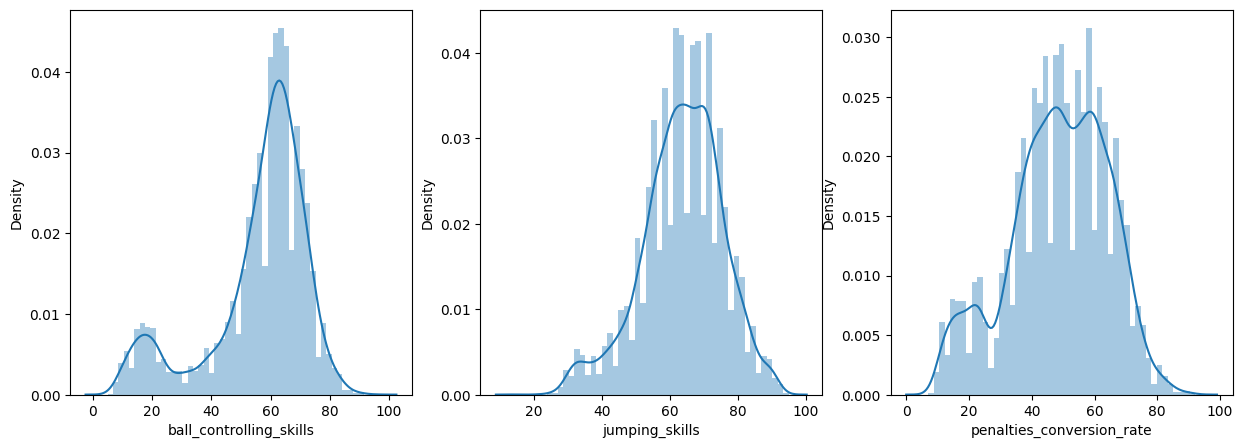

In [63]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data['ball_controlling_skills'], ax=axs[0])
sns.distplot(data['jumping_skills'],ax=axs[1])
sns.distplot( data['penalties_conversion_rate'], ax=axs[2])

<Axes: xlabel='behaviour_rating', ylabel='Density'>

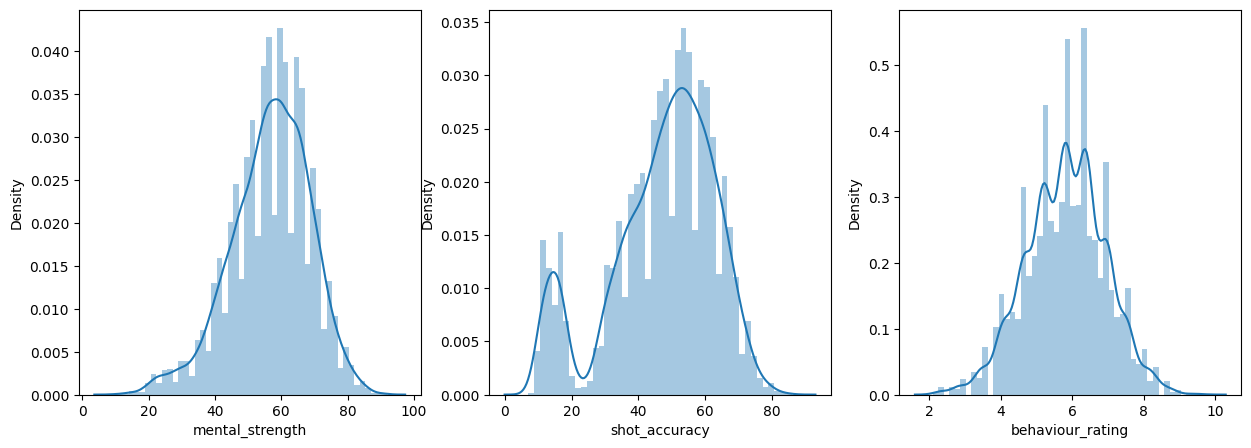

In [64]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data['mental_strength'], ax=axs[0])
sns.distplot(data['shot_accuracy'],ax=axs[1])
sns.distplot( data['behaviour_rating'], ax=axs[2])

<Axes: xlabel='years_of_experience', ylabel='Density'>

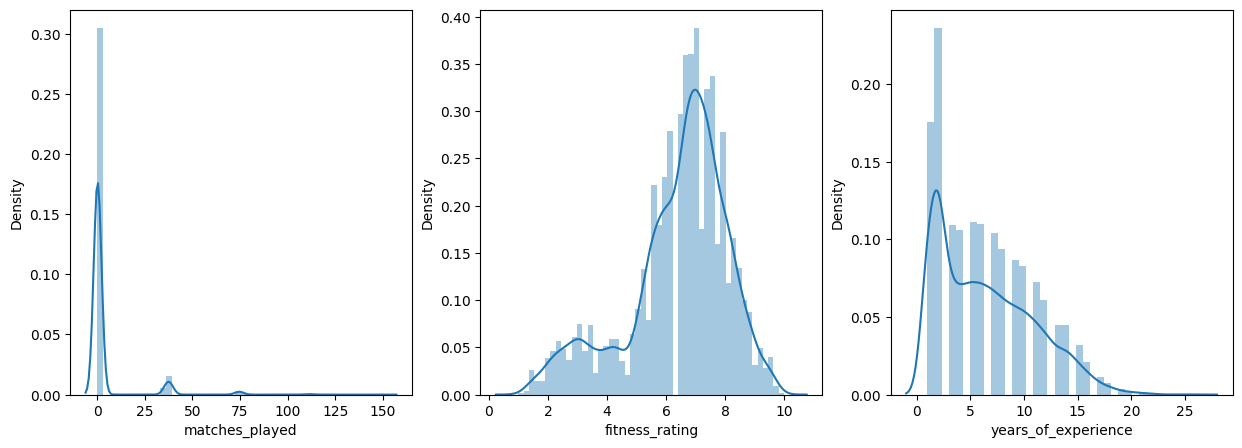

In [65]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data['matches_played'], ax=axs[0])
sns.distplot(data['fitness_rating'],ax=axs[1])
sns.distplot( data['years_of_experience'], ax=axs[2])

Missing Value Handling

In [66]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [68]:
#columns that are not contributing are dropped
data.drop(['name','country','matches_played'],axis=1,inplace=True)

In [69]:
#converting categorical data into numerical
data['height']=data['height'].str.replace("'",'.')
data['height'] = pd.to_numeric(data['height'])

In [71]:
data['height'].dtypes

dtype('float64')

In [74]:
data['weight'].dtypes
data['weight']=data['weight'].str.split("lbs",expand=True)[0]
data['weight'] = pd.to_numeric(data['weight'])

In [76]:
data['weight'].dtypes

dtype('float64')

In [ ]:
#filling missing values(numerical)

In [77]:
data['weight']=data['weight'].fillna(data['weight'].mean())
data['ball_controlling_skills']=data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].median())
data['jumping_skills']=data['jumping_skills'].fillna(data['jumping_skills'].median())
data['penalties_conversion_rate']=data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].median())
data['mental_strength']=data['mental_strength'].fillna(data['mental_strength'].mean())
data['shot_accuracy']=data['shot_accuracy'].fillna(data['shot_accuracy'].median())
data['behaviour_rating']=data['behaviour_rating'].fillna(data['behaviour_rating'].median())
data['fitness_rating']=data['fitness_rating'].fillna(data['fitness_rating'].median())
data['years_of_experience']=data['years_of_experience'].fillna(data['years_of_experience'].median())

In [ ]:
#filling missing values(categorical)

In [80]:
print(data['gender'].mode())
data['gender']=data['gender'].fillna(data['gender'].mode()[0])
print(data['strong_foot'].mode())
data['strong_foot']=data['strong_foot'].fillna(data['strong_foot'].mode()[0])
print(data['coaching'].mode())
data['coaching']=data['coaching'].fillna(data['coaching'].mode()[0])

0    M
Name: gender, dtype: object
0    Right
Name: strong_foot, dtype: object
0    Academy
Name: coaching, dtype: object


In [82]:
data.isna().sum()

player_id                    0
age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [83]:
data.head(10)

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,23,M,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,Right,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,18,M,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,Any,5.3,6.8,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,16,F,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,Left,4.7,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,27,M,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,Right,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,19,F,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,Right,5.9,5.7,5.0,Medium,Academy,4.0,0.0,0
5,PLID_10351,21,M,6.00,174.0,63.0,69.0,65.0,65.0,55.0,...,30.4,Right,6.3,6.9,3.0,Medium,Academy,7.0,0.0,0
6,PLID_21799,24,F,5.10,148.0,64.0,68.0,71.0,53.0,42.0,...,28.3,Left,6.9,7.3,2.0,High,Academy,10.0,0.0,0
7,PLID_20082,21,F,5.11,168.0,58.0,60.0,57.0,74.0,34.0,...,22.3,Right,5.9,6.8,5.0,Medium,Talent Hunt,6.0,0.0,1
8,PLID_22917,25,M,6.00,176.0,67.0,70.0,58.0,65.0,50.0,...,28.3,Right,6.9,8.2,2.0,Medium,Academy,11.0,0.0,1
9,PLID_9364,16,M,6.20,183.0,49.0,56.0,61.0,62.0,27.0,...,24.4,Right,4.7,6.1,2.0,Medium,Unknown,2.0,0.0,1


In [85]:
#label encoding train set
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in [ 'player_id', 'gender', 'strong_foot', 'dedication_level',
       'coaching']:
          data[col]=le.fit_transform(data[col])


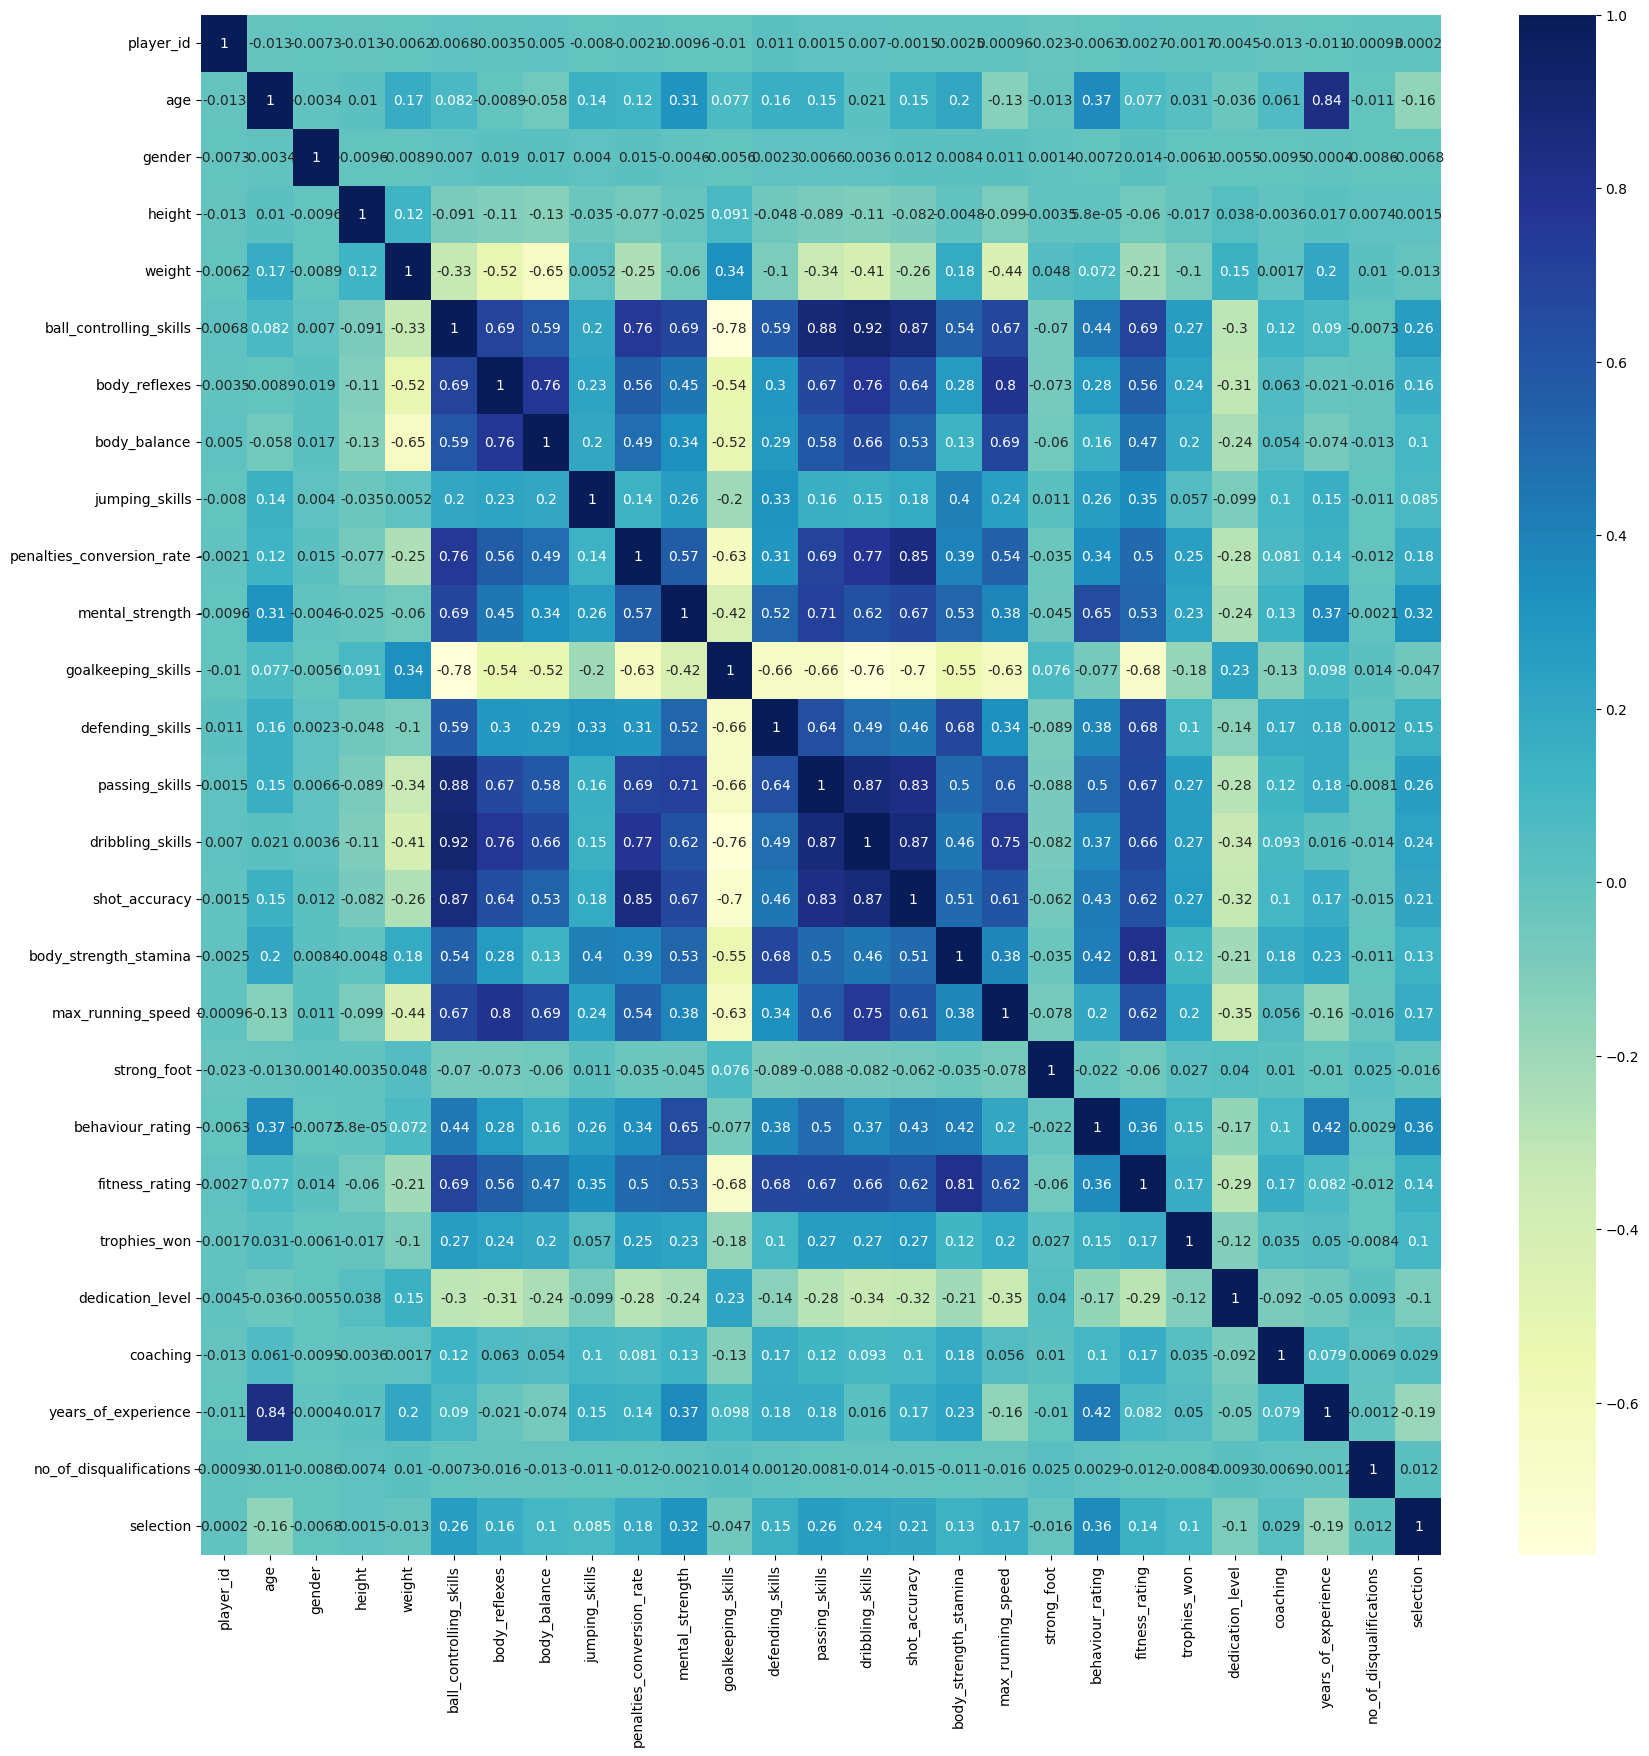

In [86]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Managing Outliers

In [87]:
data.columns

Index(['player_id', 'age', 'gender', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'fitness_rating', 'trophies_won', 'dedication_level', 'coaching',
       'years_of_experience', 'no_of_disqualifications', 'selection'],
      dtype='object')

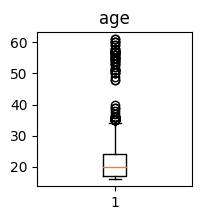

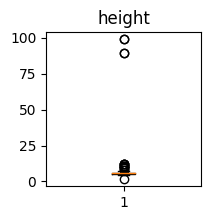

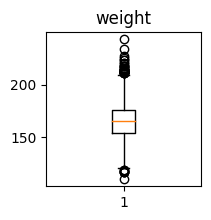

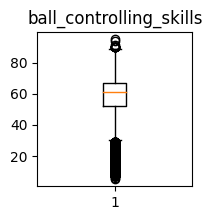

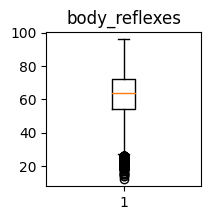

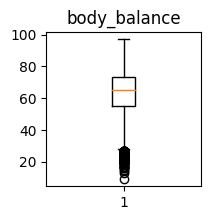

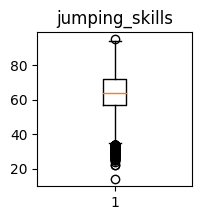

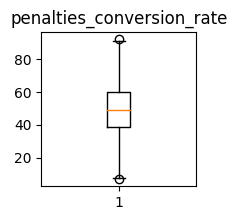

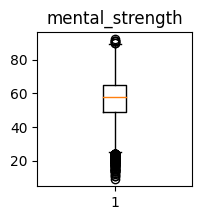

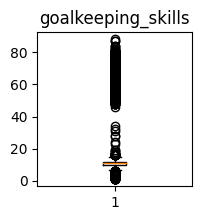

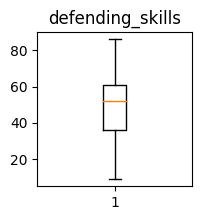

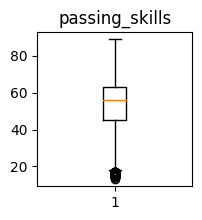

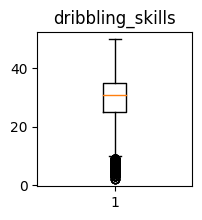

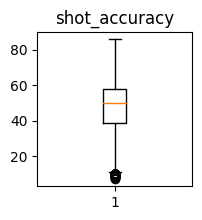

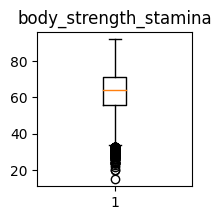

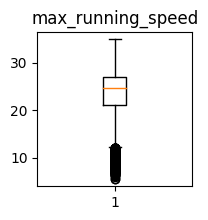

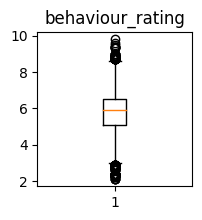

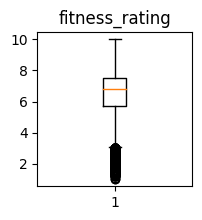

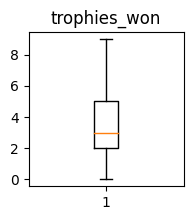

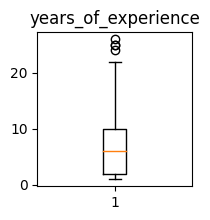

In [90]:
#checking for outliners in test set
#ploting boxplot to see outliners
for i in [ 'age','height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed',  'behaviour_rating',
       'fitness_rating', 'trophies_won',
       'years_of_experience']:
       plt.figure(figsize=(2,2))
       plt.boxplot(data[i])
       plt.title(i)

In [ ]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')

Scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
df=data

In [95]:
data.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,10668,23,1,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,3,7.7,8.1,2.0,0,2,8.0,0.0,1
1,829,18,1,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,0,5.3,6.8,3.0,2,1,3.0,0.0,0
2,6136,16,0,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,1,4.7,6.6,5.0,1,0,2.0,0.0,1
3,5018,27,1,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,3,8.6,8.6,6.0,2,0,13.0,16.0,1
4,13765,19,0,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,3,5.9,5.7,5.0,2,0,4.0,0.0,0


In [99]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,0.762381,0.155556,1.0,0.048205,0.496241,0.800000,0.547619,0.431818,0.555556,0.400000,...,0.641892,1.000000,0.727273,0.788889,0.222222,0.0,0.666667,0.28,0.975586,1.0
1,0.059244,0.044444,1.0,0.036923,0.285714,0.544444,0.678571,0.693182,0.592593,0.541176,...,0.581081,0.000000,0.415584,0.644444,0.333333,1.0,0.333333,0.08,0.975586,0.0
2,0.438505,0.000000,0.0,0.048205,0.466165,0.322222,0.369048,0.409091,0.679012,0.494118,...,0.601351,0.333333,0.337662,0.622222,0.555556,0.5,0.000000,0.04,0.975586,1.0
3,0.358608,0.244444,1.0,0.037026,0.413534,0.822222,0.726190,0.761364,0.888889,0.870588,...,0.533784,1.000000,0.844156,0.844444,0.666667,1.0,0.000000,0.48,0.991211,1.0
4,0.983706,0.066667,0.0,0.044103,0.360902,0.466667,0.583333,0.738636,0.530864,0.494118,...,0.608108,1.000000,0.493506,0.522222,0.555556,1.0,0.000000,0.12,0.975586,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,0.045523,0.088889,1.0,0.046154,0.383459,0.611111,0.428571,0.602273,0.567901,0.388235,...,0.456081,1.000000,0.506494,0.733333,0.222222,1.0,0.000000,0.20,0.975586,1.0
13990,0.349603,0.044444,0.0,0.036923,0.413534,0.533333,0.666667,0.568182,0.728395,0.200000,...,0.658784,1.000000,0.415584,0.511111,0.333333,1.0,0.000000,0.12,0.975586,0.0
13991,0.773387,0.022222,1.0,0.046154,0.466165,0.566667,0.726190,0.602273,0.444444,0.470588,...,0.780405,0.333333,0.467532,0.744444,0.333333,0.5,0.666667,0.04,0.975586,1.0
13992,0.102980,0.088889,0.0,0.036923,0.300752,0.733333,0.678571,0.693182,0.456790,0.576471,...,0.679054,0.333333,0.610390,0.533333,0.444444,1.0,0.000000,0.20,0.975586,1.0


Model Building

In [100]:
#splitting features
x=df_scaled.drop('selection',axis=1)
y=df_scaled['selection']

In [101]:
x.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,0.762381,0.155556,1.0,0.048205,0.496241,0.800000,0.547619,0.431818,0.555556,0.400000,...,0.740260,0.641892,1.000000,0.727273,0.788889,0.222222,0.0,0.666667,0.28,0.975586
1,0.059244,0.044444,1.0,0.036923,0.285714,0.544444,0.678571,0.693182,0.592593,0.541176,...,0.506494,0.581081,0.000000,0.415584,0.644444,0.333333,1.0,0.333333,0.08,0.975586
2,0.438505,0.000000,0.0,0.048205,0.466165,0.322222,0.369048,0.409091,0.679012,0.494118,...,0.662338,0.601351,0.333333,0.337662,0.622222,0.555556,0.5,0.000000,0.04,0.975586
3,0.358608,0.244444,1.0,0.037026,0.413534,0.822222,0.726190,0.761364,0.888889,0.870588,...,0.818182,0.533784,1.000000,0.844156,0.844444,0.666667,1.0,0.000000,0.48,0.991211
4,0.983706,0.066667,0.0,0.044103,0.360902,0.466667,0.583333,0.738636,0.530864,0.494118,...,0.532468,0.608108,1.000000,0.493506,0.522222,0.555556,1.0,0.000000,0.12,0.975586


In [102]:
y.value_counts()

1.0    7802
0.0    6192
Name: selection, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [104]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [105]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.764218348099457
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      1611
         1.0       0.76      0.82      0.79      1888

    accuracy                           0.76      3499
   macro avg       0.76      0.76      0.76      3499
weighted avg       0.76      0.76      0.76      3499



In [106]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]#creating empty list for putting accuracy values of different k values
neighbors=np.arange(2,10)#creating array with values

for k in neighbors:
       classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#instance called classifier
       model=classifier.fit(x_train,y_train)#model created
       y_pred=model.predict(x_test)
       acc =accuracy_score(y_test,y_pred)
       metric_k.append(acc)#given accuracy to empty list

In [107]:
metric_k

[0.6699056873392398,
 0.7062017719348386,
 0.7007716490425836,
 0.7164904258359531,
 0.715061446127465,
 0.7304944269791369,
 0.7276364675621606,
 0.7390683052300657]

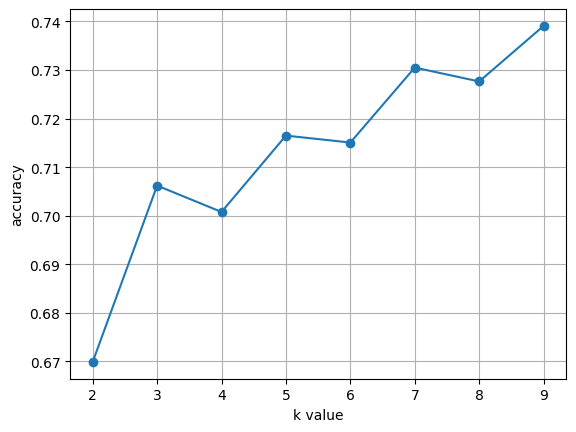

In [108]:
#ploting the list metric_k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [109]:
classifier=KNeighborsClassifier(9,metric='minkowski',p=2)#instance called classifier
model=classifier.fit(x_train,y_train)#model created
y_pred=model.predict(x_test)#predicting the model
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,))
print('Recall=',recall_score(y_test,y_pred))
print('F1=',f1_score(y_test,y_pred))

Accuracy= 0.7390683052300657
Precision= 0.7386196769456681
Recall= 0.7992584745762712
F1= 0.7677435766980412


In [110]:
#printing confusion matrix
confusion_matrix(y_test,y_pred)

array([[1077,  534],
       [ 379, 1509]])

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      1611
         1.0       0.74      0.80      0.77      1888

    accuracy                           0.74      3499
   macro avg       0.74      0.73      0.74      3499
weighted avg       0.74      0.74      0.74      3499



In [125]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.8531008859674193


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1611
         1.0       0.86      0.87      0.87      1888

    accuracy                           0.85      3499
   macro avg       0.85      0.85      0.85      3499
weighted avg       0.85      0.85      0.85      3499



In [113]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.7 MB/s eta 0:00:00


In [114]:
#catboost
import catboost as ctb

# fit a CART model to the data
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model = ctb.CatBoostClassifier(silent=True)
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))

# summarize the fit of the model
print(classification_report(y_test,y_pred))

Accuracy is:  0.862532152043441
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1611
         1.0       0.87      0.88      0.87      1888

    accuracy                           0.86      3499
   macro avg       0.86      0.86      0.86      3499
weighted avg       0.86      0.86      0.86      3499



In [115]:
#Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold_validator = StratifiedKFold(n_splits=10)

In [116]:
#lr
skcv_result = cross_val_score(lr_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.7659007964872868

In [118]:
#cb
skcv_result = cross_val_score(model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.866227764729909

Catboost gives the best accuracy

Hyperparameter Tuning

In [119]:
#randomsearchcv
n_estimators = [10,20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
bootstrap = [True,False]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

In [120]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [127]:
rf = RandomForestClassifier()

In [128]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [129]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 60, 100, 120]},
                   verbose=2)

In [130]:
rf_grid.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [131]:
rf_grid.best_score_

0.8497379704621247

In [132]:
y_pred=rf_grid.predict(x_test)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      1611
         1.0       0.84      0.87      0.86      1888

    accuracy                           0.84      3499
   macro avg       0.84      0.84      0.84      3499
weighted avg       0.84      0.84      0.84      3499

